# Premier League Data Analysis

In [66]:
# Import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load the datasets to analyze their structure and determine the cleaning steps needed
season2020 = pd.read_csv('dataPremierLeague/season2020.csv')
season2021 = pd.read_csv('dataPremierLeague/season2021.csv')
season2022 = pd.read_csv('dataPremierLeague/season2022.csv')
season2023 = pd.read_csv('dataPremierLeague/season2023.csv')

# Analyze the first few rows of each dataset to understand their structure
season2020_head = season2020.head()
season2021_head = season2021.head()
season2022_head = season2022.head()
season2023_head = season2023.head()

## Cleaning the data

In [60]:
def cleanData(df):
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    
    # Convert date strings to datetime objects
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    
    # Normalize textual data: e.g., team names to lowercase
    df['HomeTeam'] = df['HomeTeam'].str.capitalize()
    df['AwayTeam'] = df['AwayTeam'].str.capitalize()

    # Ensure numeric data is of the correct type and handle any missing values as needed
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Fill numeric missing values with a default value (e.g., 0 or mean of the column)
    df[numeric_columns] = df[numeric_columns].fillna(0)

    # Replace any non-numeric betting odds with NaN and then with the mean odds
    betting_columns = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
    for col in betting_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df.loc[:, col] = df.loc[:, col].fillna(df[col].mean())

    # Drop columns that are not used anymore based on the notes
    deprecated_columns = ['Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA']
    df.drop(columns=[col for col in deprecated_columns if col in df.columns], inplace=True, errors='ignore')

    # Convert full time and half time result to categorical data type
    categorical_columns = ['FTR', 'HTR']
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].astype('category')

    return df

In [65]:
# Clean each season´s data
cleaned_2020 = cleanData(season2020)
cleaned_2021 = cleanData(season2021)
cleaned_2022 = cleanData(season2022)
cleaned_2022 = cleanData(season2023)

cleaned_2020.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,2020-09-12,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,2020-09-12,15:00,Crystal palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,2020-09-12,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,2020-09-12,20:00,West ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,2020-09-13,14:00,West brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


## General Football Information Visualized

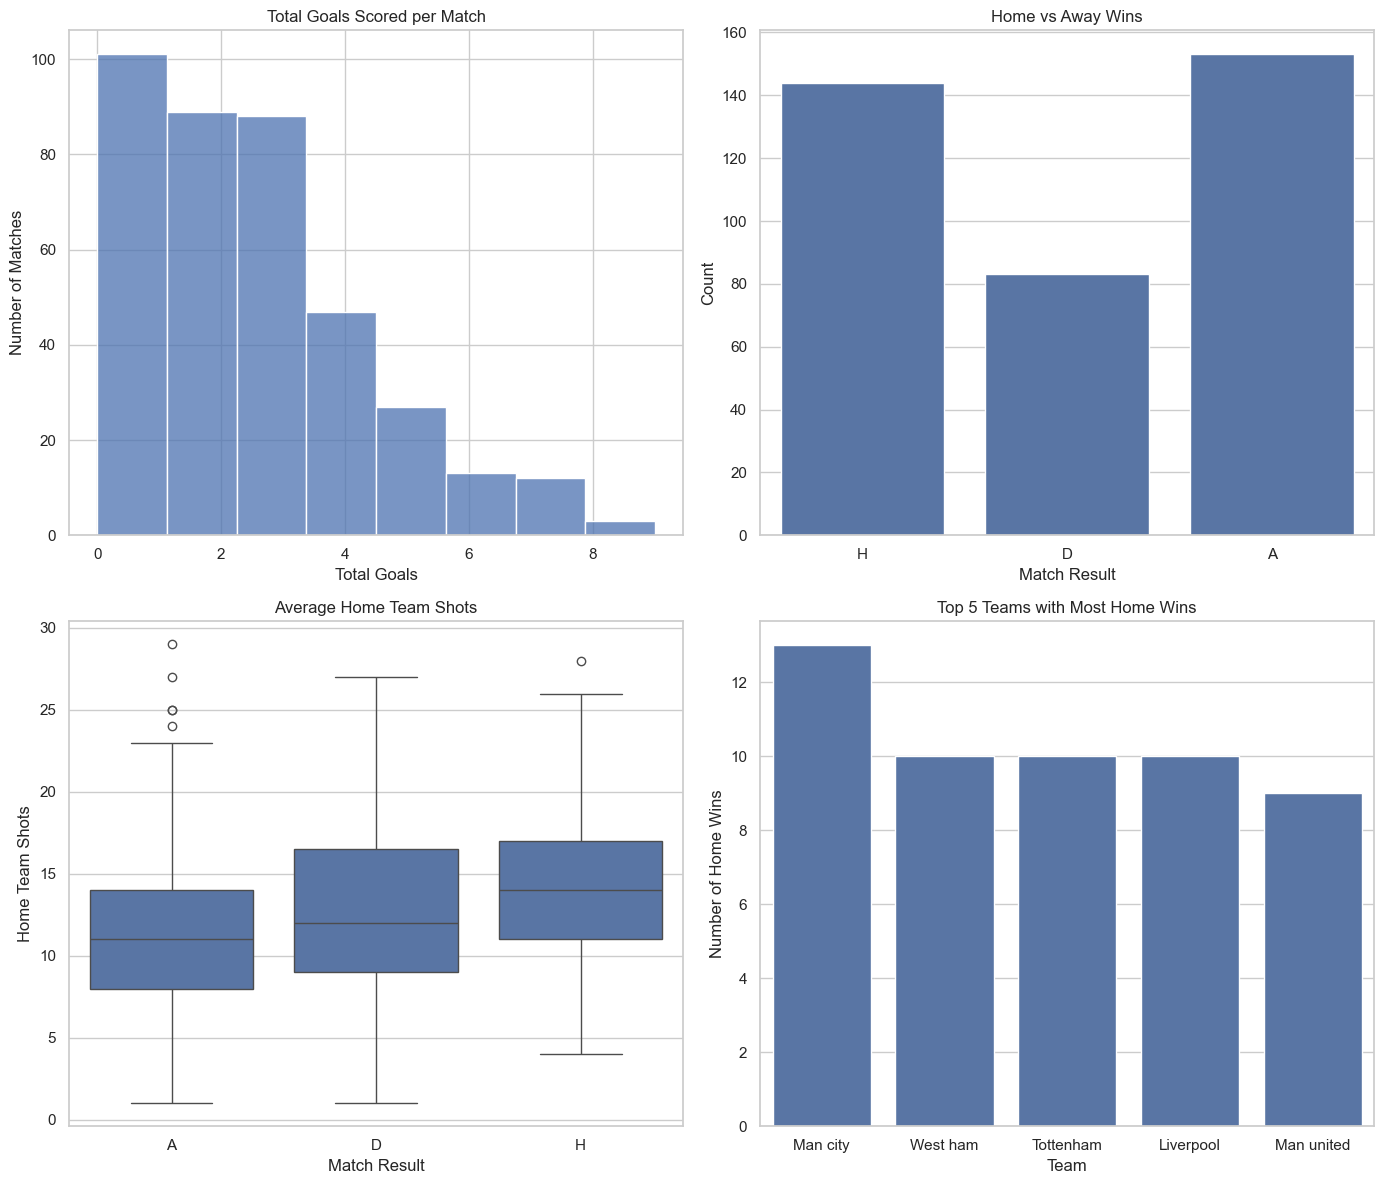

In [85]:
# Setting up the visualization using seaborn's style
sns.set(style="whitegrid")

# Create a figure with 2x2 subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Visualization 1: Total Goals Scored per Match (Histogram)
sns.histplot(cleaned_2020["FTHG"] + cleaned_2020["FTAG"], bins=8, kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Total Goals Scored per Match")
axes[0, 0].set_xlabel("Total Goals")
axes[0, 0].set_ylabel("Number of Matches")

# Visualization 2: Home vs Away Wins (Countplot)
sns.countplot(x="FTR", data=cleaned_2020, order=["H", "D", "A"], ax=axes[0, 1])
axes[0, 1].set_title("Home vs Away Wins")
axes[0, 1].set_xlabel("Match Result")
axes[0, 1].set_ylabel("Count")

# Visualization 3: Average Home Team Shots (Boxplot)
sns.boxplot(x="FTR", y="HS", data=cleaned_2020, ax=axes[1, 0])
axes[1, 0].set_title("Average Home Team Shots")
axes[1, 0].set_xlabel("Match Result")
axes[1, 0].set_ylabel("Home Team Shots")

# Visualization 4: Top 5 Teams with Most Home Wins (Barplot)
home_wins = cleaned_2020[cleaned_2020['FTR'] == 'H']['HomeTeam'].value_counts().head(5)
sns.barplot(x=home_wins.index, y=home_wins.values, ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Teams with Most Home Wins')
axes[1, 1].set_xlabel('Team')
axes[1, 1].set_ylabel('Number of Home Wins')

# Tight layout to provide space for titles
plt.tight_layout()
plt.show()

- **Total Goals Scored Per match (Histogram, Top Left):** This histogram illustrates the frequency of the total number of goals socred in matches. Most matches see between 0 and 4 goals in total, with the frequency decreasing as the number of goals increases. This is typical for football matches, as high-scoring games are less common. The histogram gives a good visual representation of the goal-scoring distribution acros all matches in the dataset.
  
- **Home vs Away (Bar Chart, Top Right):** The bar chart presents the number of matches that resulted in Home wins (H), Draws (D), and Away wins (A). Contrary to the usual home advantage expectation, this chart shows that away teams have a slightly higher number of wins compared to home teams in the dataset, which is somewhat unusual in football statistics. Draws are less frequent than either home or away wins, indicating a more decisive outcome in most matches. The graph challenges the typical notion of home advantage, suggesting that in this dataset, away teams might have been particularly successful or that the dataset includes many strong teams with good away records.

- **Average Home Team Shots:** This boxplot shows the distribution of shots taken by the home teams, categorized by the match result (Away win, Draw, Home win). The median number of shots is indicated by the line in the box, and the "whiskers" extended to show the range of the data. Points outside the whiskers are outliers. From the plot, it seems that home teams tend to take more shots when they win, which suggests a correlation between the number of shots and winning the match.

- **Top 5 Teams with Most Home Wins (Bar Chart, Bottom Right):** This bar chart ranks the top five teams by the number of home wins they have achieved. The team with the most home wins is on the left, and the counts decrease moving to the right. This chart is useful for quickly identifying the strongest teams in terms of home match performance.

# Visualizing The Bet365 Sportsbook

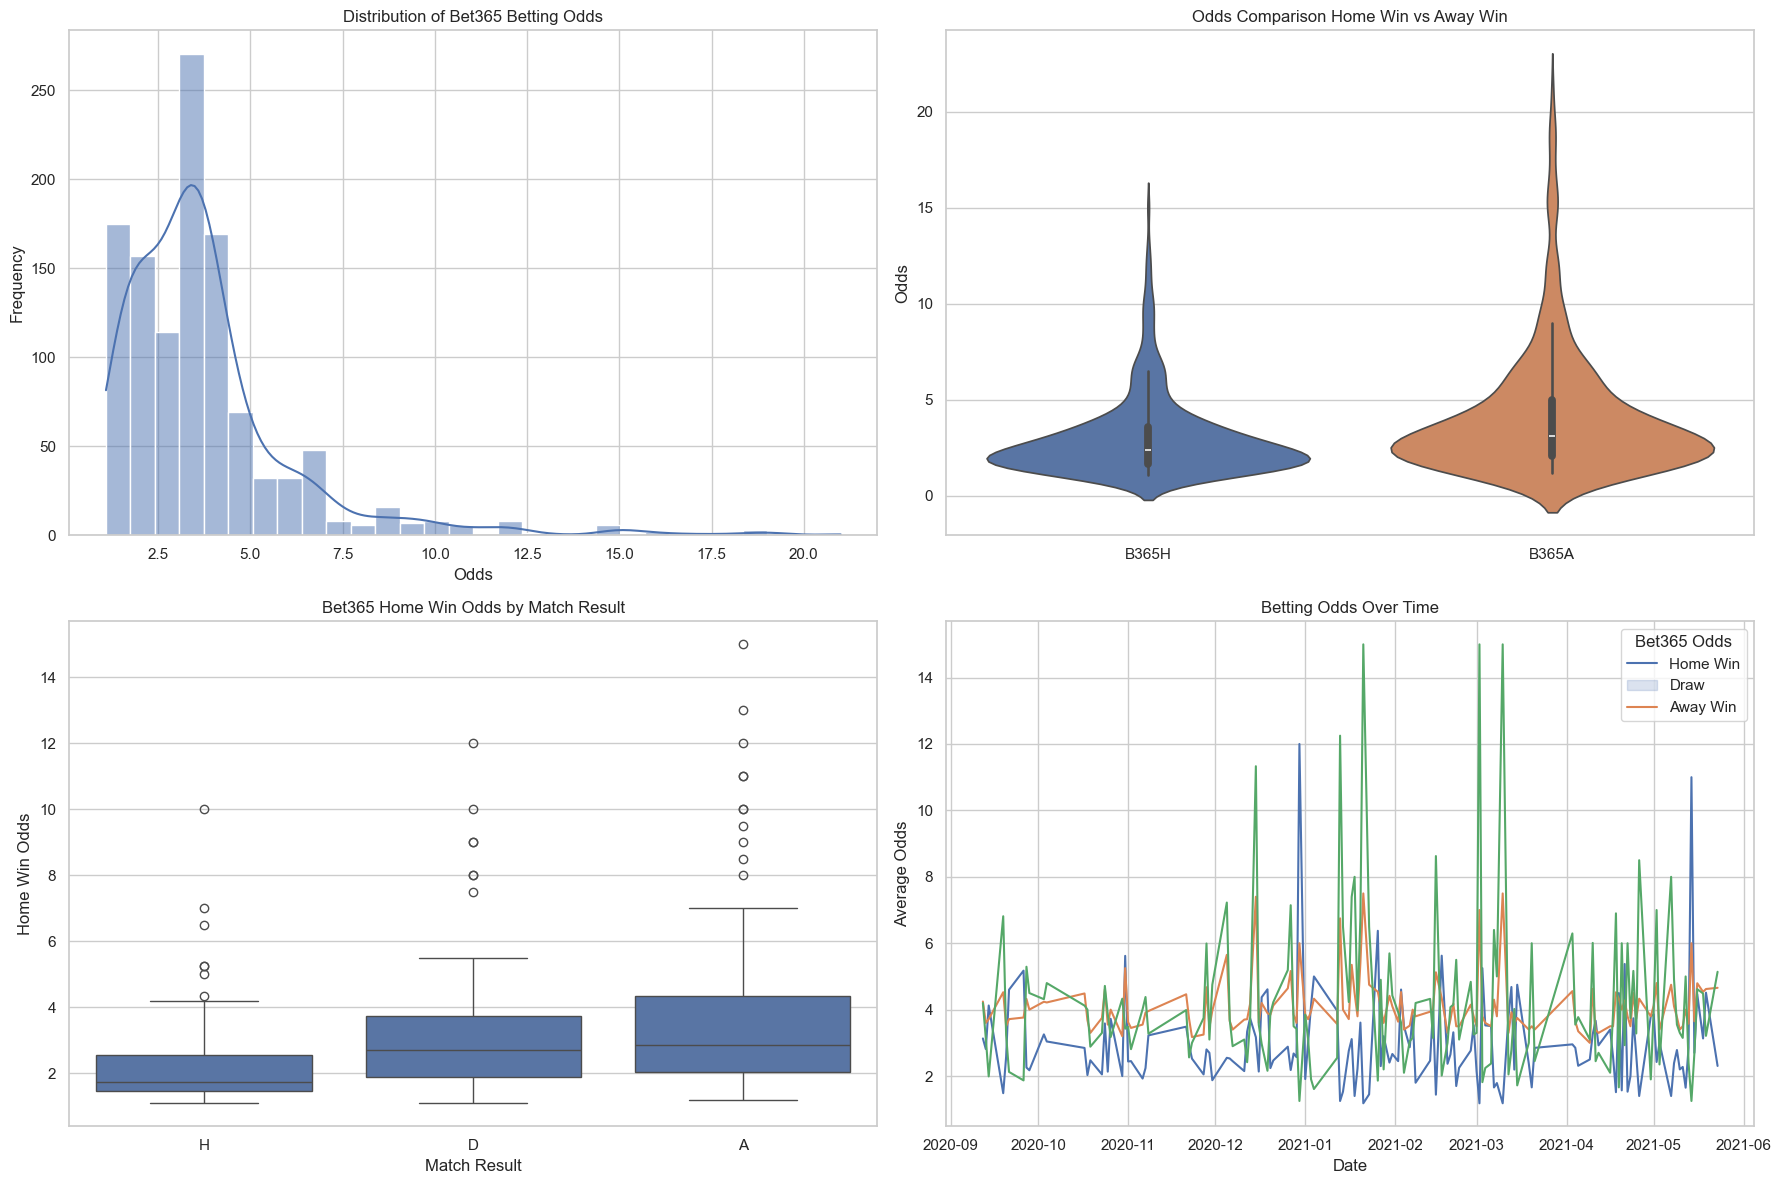

In [96]:
# Create a figure with 2x2 subplots for different visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Assuming 'B365H', 'B365D', 'B365A' are columns for Bet365 betting odds for home win, draw, and away win
# Visualization 1: Bet365 Betting Odds Distribution (Histogram)
sns.histplot(cleaned_2020[['B365H', 'B365D', 'B365A']].stack(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bet365 Betting Odds')
axes[0, 0].set_xlabel('Odds')
axes[0, 0].set_ylabel('Frequency')

# Visualization 2: Odds Comparison Home Win vs Away Win (Violin Plot)
sns.violinplot(data=cleaned_2020[['B365H', 'B365A']], ax=axes[0, 1])
axes[0, 1].set_title('Odds Comparison Home Win vs Away Win')
axes[0, 1].set_ylabel('Odds')

# Visualization 3: Bet365 Home Win Odds (Boxplot)
sns.boxplot(x='FTR', y='B365H', data=cleaned_2020, order=['H', 'D', 'A'], ax=axes[1, 0])
axes[1, 0].set_title('Bet365 Home Win Odds by Match Result')
axes[1, 0].set_xlabel('Match Result')
axes[1, 0].set_ylabel('Home Win Odds')

# Visualization 4: Betting Odds Over Time (Lineplot)
# For this, we assume the Date column is set to a datetime format
# We will average the odds over all the games on a particular date
average_odds_over_time = cleaned_2020.groupby('Date')[['B365H', 'B365D', 'B365A']].mean().reset_index()
sns.lineplot(x='Date', y='value', hue='variable', data=pd.melt(average_odds_over_time, ['Date']), ax=axes[1, 1])
axes[1, 1].set_title('Betting Odds Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Average Odds')
axes[1, 1].legend(title='Bet365 Odds', labels=['Home Win', 'Draw', 'Away Win'])

# Tight layout to provide space for titles
plt.tight_layout()
plt.show()

 ## 1 Distribution of Bet365 Betting Odds (Histogram,Top Left)
- This histogram illustrates the distribution of betting odds offered by Bet365 for home wins, draw, and away win across all matches in the dataset. The x-axis represents the range of odds, while the y-axis shows the frequency of occurrence for each range. The histogram provides insight into the spread and frequency of occurrence for each range. The histogram provides insight into the spread and frequency of betting odds offered by Bet365 for different match outcomes. It shows that most odds fall within a certain range, with fewer occurences of extreme odds.
  
- From the histogram, we observe that the majority of betting odds fall within a certain range for each outcome, with a peak frequence around specific odds values. This indicates taht Bet365 tends to offer odds within a realtively narrow range for most matches, with fewer occurrences of extreme odds. The distribution shape can provide insights into the bookmaker's assessment of the probabilities for different match outcomes.

## 2 Odds Comparison Home Win vs Away Win (Violin Plot, Top Right)
- The violin plot compares the distribution of Bet365 betting odds for home wins and away wins. The width of each "violin" represents the probability density ofthe odds at different values. This visualization allows us to compare the central tendency, spread, and shape of the distributions for home win and away win odds. It provides insight into whether Bet365 tends to offer higher or lower odds for home wins compared to away wins.
  
- By examining the width and shape of the violin plots, we can infer the relative likelihood of different oods values for each outcome. If one distribution has a wider or more spread-out shape, it suggests higher variability in the offered odds for that outcome. Comparing the two violin plots enables us to assess whether Bet365 tends to offer higher or lower odds for home wins compared to away wins, providing insights into the bookmaker's perceived probabilities.

## 3 Bet365 Home Win Odds by Match Result (Boxplot, Bottom Left)
- This boxplot illustrates the distribution of Bet365 betting odds for home wins across different match results (Home win, Draw, Away win). By comparing the median, interquartile range (IQR), and outliers of each boxplot, we can identify any variations in home win odds depending on the match outcome. For example, if the median home win ods are consistently higher or loer for certain match results, it may indicate differences in perceived probabilities by the bookmaker based on match characteristics. Additionally, the presence of outliers can signal exceptional casses where the odds deviate from the typical range.

## 4 Betting Odds Over Time (Lineplot, Bottom Right)
- This line plot tracks the average Bet365 betting odds for home win, draws, and away wins over time, providing insights into trends and fluctuations in the offered odds. By analyzing the trend lines for each outcome, we can identfy periods of stability, volatility, or systematic changes in the odds over time. For example, if the average odds for home wins show a consistent decrease over time, it may suggest a shift in perceived probabilities or betting market dynamics. This visualization enables us to understand how Bet365 adjusts its over time in response to various factors such as team performance, injuries, or betting patterns.

# Cleaned Data to CSV

In [101]:
w2020 = cleaned_2020.to_csv("cleaned_2020.csv")
w2021 = cleaned_2020.to_csv("cleaned_2021.csv")
w2022 = cleaned_2020.to_csv("cleaned_2022.csv")
w2023 = cleaned_2020.to_csv("cleaned_2023.csv")